# Sobre o Projeto
## Análise da relação entre o grau de escolaridade dos pais e outros fatores na perfomance do estudante 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Dataset

In [2]:
Data_Set = pd.read_csv('StudentsPerformance+(1).csv')

Data_Set.shape

(1000, 8)

In [3]:
Data_Set.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Valores Nulos

In [4]:
Nulls = Data_Set.isnull()
Nulls

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [5]:
Nulls.sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Valores Únicos

In [6]:
Data_Set.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Valores Duplicados

In [7]:
Data_Set.duplicated().sum()

0

### Informações

In [8]:
Data_Set.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Informações

In [9]:
Data_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
Data_Set['gender'].value_counts(normalize=True) * 100

female    51.8
male      48.2
Name: gender, dtype: float64

In [11]:
Data_Set['race/ethnicity'].value_counts(normalize=True) * 100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

In [12]:
Data_Set['parental level of education'].value_counts(normalize=True) * 100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

In [13]:
Data_Set['lunch'].value_counts(normalize=True) * 100

standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64

In [14]:
Data_Set['test preparation course'].value_counts(normalize=True) * 100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

### Boxplots da informação do Curso de Preparação para o Teste

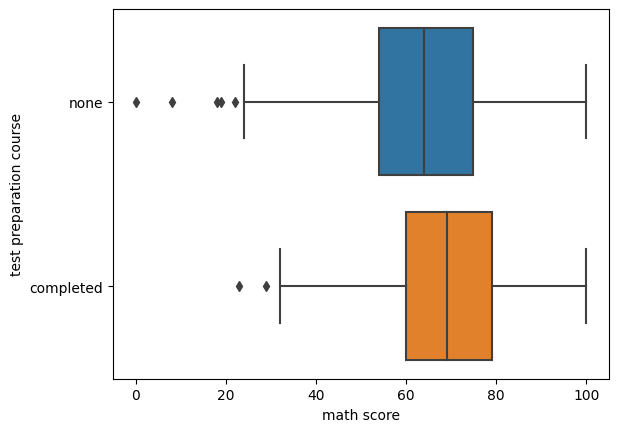

In [15]:
sns.boxplot(data=Data_Set, x='math score', y='test preparation course');

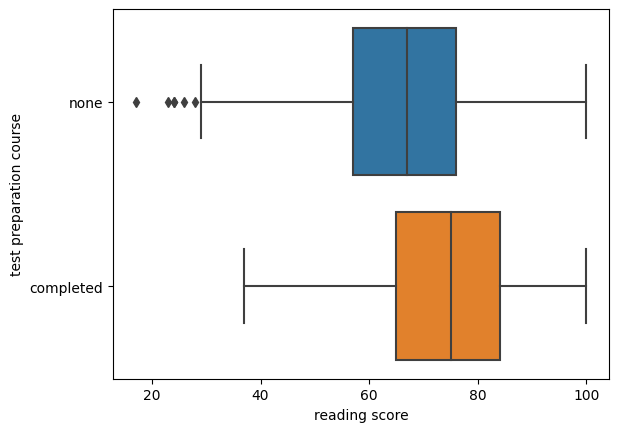

In [16]:
sns.boxplot(data=Data_Set, x='reading score', y='test preparation course');

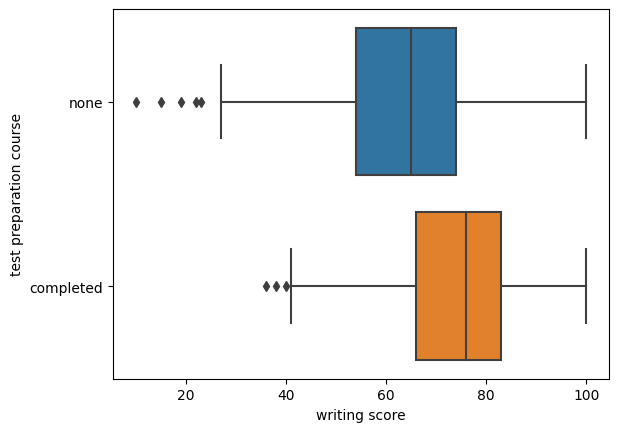

In [17]:
sns.boxplot(data=Data_Set, x='writing score', y='test preparation course');

In [18]:
Data_Set.groupby(by =['test preparation course']).describe()['writing score'].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,74.418994,13.375335,36.0,66.0,76.0,83.0,100.0
1,none,642.0,64.504673,14.999661,10.0,54.0,65.0,74.0,100.0


### Análise do Grau de Escolaridade dos Pais

#### Nota Matemática

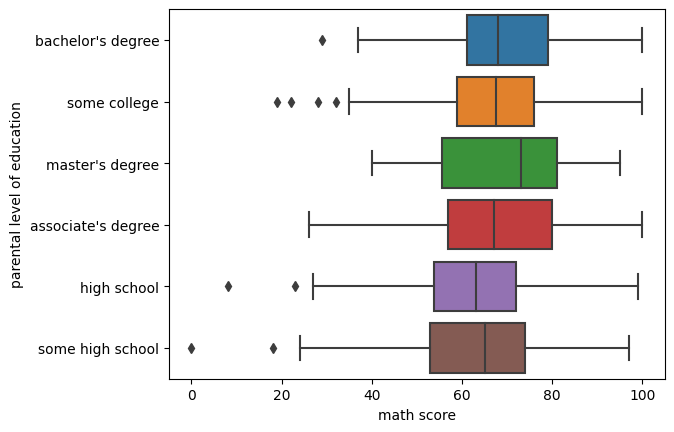

In [19]:
sns.boxplot(data=Data_Set, x='math score', y='parental level of education');

In [20]:
Data_Set.groupby(by=['parental level of education']).describe()['math score'].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


#### Nota Leitura

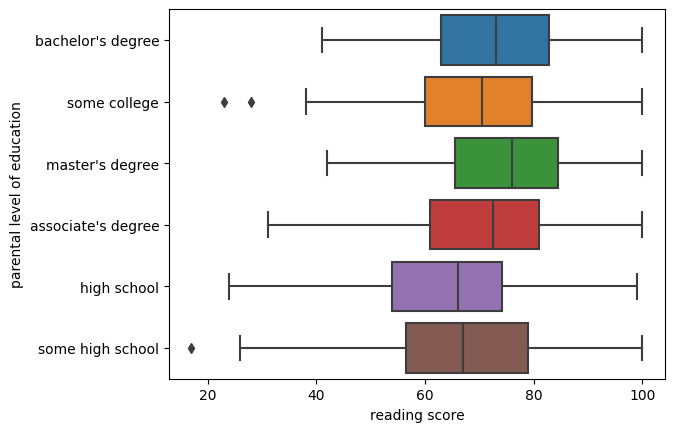

In [21]:
sns.boxplot(data=Data_Set, x='reading score', y='parental level of education');

In [22]:
Data_Set.groupby(by=['parental level of education']).describe()['reading score'].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,70.927928,13.868948,31.0,61.0,72.5,81.00,100.0
1,bachelor's degree,118.0,73.000000,14.285250,41.0,63.0,73.0,82.75,100.0
2,high school,196.0,64.704082,14.132130,24.0,54.0,66.0,74.25,99.0
3,master's degree,59.0,75.372881,13.775163,42.0,65.5,76.0,84.50,100.0
4,some college,226.0,69.460177,14.057049,23.0,60.0,70.5,79.75,100.0
5,some high school,179.0,66.938547,15.479295,17.0,56.5,67.0,79.00,100.0


#### Nota Redação

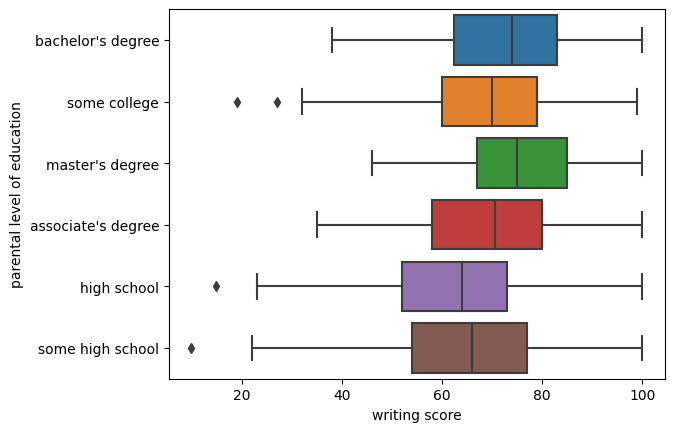

In [23]:
sns.boxplot(data=Data_Set, x='writing score', y='parental level of education');

In [24]:
Data_Set.groupby(by=['parental level of education']).describe()['writing score'].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,69.896396,14.311122,35.0,58.0,70.5,80.0,100.0
1,bachelor's degree,118.0,73.381356,14.728262,38.0,62.5,74.0,83.0,100.0
2,high school,196.0,62.448980,14.085907,15.0,52.0,64.0,73.0,100.0
3,master's degree,59.0,75.677966,13.730711,46.0,67.0,75.0,85.0,100.0
4,some college,226.0,68.840708,15.012331,19.0,60.0,70.0,79.0,99.0
5,some high school,179.0,64.888268,15.736197,10.0,54.0,66.0,77.0,100.0
